[Reference](https://pub.towardsai.net/automate-powerpoint-presentation-report-with-python-1d899ed16b2e)

In [2]:
pip install python-pptx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 13.8 MB/s eta 0:00:00
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470952 sha256=4acba2269f5cef7e93bebd3cc3f01fe435f83ecccd6d6960c129789c2a7aa39e
  Stored in directory: /root/.cache/pip/wheels/b0/38/58/8530ed1681bfee42349acf166867cc9fb369517b2fce83e599
Successfully built python-pptx


In [3]:
import pandas as pd
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches

In [4]:
df = sns.load_dataset('mpg')
df.to_csv('mpg.csv', index = False)

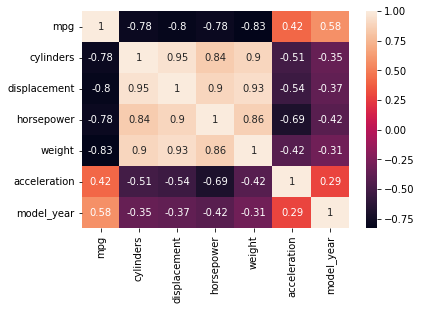

In [7]:
df = pd.read_csv('mpg.csv')
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
title_only_slide_layout = prs.slide_layouts[5]

slide1 = prs.slides.add_slide(title_slide_layout)

title = slide1.shapes.title
subtitle = slide1.placeholders[1]

title.text = "Trying out PowerPoint Automation"
subtitle.text = "With python-pptx and GitHub action!"

slide2 = prs.slides.add_slide(title_only_slide_layout)
slide2.shapes.title.text = 'Add Image with Python'

img = sns.heatmap(df.corr(), annot = True).get_figure()
img.savefig('heatmap1.png')

left = Inches(3)
top = Inches(3)
height = Inches(4)
pic = slide2.shapes.add_picture('heatmap1.png', left, top, height=height)

prs.save('report.pptx')